<a href="https://colab.research.google.com/github/jrdeborja/R-and-Python-code/blob/main/rock1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR-based machine learning modeling for ROCK1 in the methods section**
## **2.5 Model building**
### 2.5.1 Machine learning dataset
### 2.5.2 Multiple model building
### 2.5.3 Model stacking
### 2.5.4 Model evaluation
### 2.5.5 Feature importance
### 2.5.6 Molecule extraction

# **2.5.1 Machine learning dataset**

In [ ]:
# Pre-processed dataset from R
# containing the molecular descriptors
# and MACCS fingerprints of ROCK1

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install pandas

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/forColab.csv')
df

,Unnamed: 0,Molecule.ChEMBL.ID,Bioactivity.Class,pIC50,Name,nAcid,ALogP,ALogp2,AMR,apol,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,1,CHEMBL2023144,inactive,2.397940,CHEMBL2023144,0,-0.1551,0.024056,8.3140,42.580516,...,0,1,0,0,1,1,1,1,1,0
1,2,CHEMBL2023145,inactive,3.397940,CHEMBL2023145,0,-0.1551,0.024056,8.3140,42.580516,...,0,1,0,0,1,1,1,1,1,0
2,3,CHEMBL1566648,inactive,3.568636,CHEMBL1566648,0,0.2540,0.064516,16.0406,31.846344,...,0,1,0,0,1,1,1,1,1,0
3,4,CHEMBL17551,inactive,3.741602,CHEMBL17551,0,-1.1703,1.369602,7.5221,20.287551,...,0,1,0,0,1,1,1,0,1,0
4,5,CHEMBL2023148,inactive,3.803824,CHEMBL2023148,0,-1.0481,1.098514,13.2426,37.843516,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,1213,CHEMBL4763198,active,9.309804,CHEMBL4763198,0,-0.8389,0.703753,34.9696,59.755446,...,1,1,1,1,1,1,1,1,1,0
1213,1214,CHEMBL3949136,active,9.366532,CHEMBL3949136,0,-2.2179,4.919080,57.4512,71.242997,...,1,1,1,1,1,1,1,1,1,0
1214,1215,CHEMBL3961538,active,9.408935,CHEMBL3961538,0,-1.2889,1.661263,58.9352,75.002618,...,1,1,1,1,1,1,1,1,1,0
1215,1216,CHEMBL3902471,active,9.585027,CHEMBL3902471,0,-1.8248,3.329895,53.6405,71.909032,...,1,1,1,1,1,1,1,1,1,0


## **Handling Missing Values (NA)**

In [ ]:
# Missing values in the dataframe
pd.isnull(df).sum().sum()

10458

In [ ]:
# Data separation as x and y ; y = f(x)
# y = response variable; x = predictor variables
y = df['pIC50']
x_md_fp = df.drop(df.loc[:, 'Unnamed: 0':'Name'].columns, axis=1)
x = x_md_fp.drop(df.loc[:, 'MACCSFP1':'MACCSFP166'].columns, axis=1)

In [ ]:
# Missing values in x
pd.isnull(x).sum().sum()

10458

In [ ]:
# Missing values in y
pd.isnull(y).sum().sum()

0

In [ ]:
# List the columns with missing values
columns_with_missing_values = x.columns[x.isnull().any()].tolist()
print(columns_with_missing_values)

['BCUTw-1l', 'BCUTw-1h', 'BCUTc-1l', 'BCUTc-1h', 'BCUTp-1l', 'BCUTp-1h', 'SCH-3', 'SCH-4', 'SCH-5', 'SCH-6', 'SCH-7', 'VCH-3', 'VCH-4', 'VCH-5', 'VCH-6', 'VCH-7', 'SC-3', 'SC-4', 'SC-5', 'SC-6', 'VC-3', 'VC-4', 'VC-5', 'VC-6', 'SPC-4', 'SPC-5', 'SPC-6', 'VPC-4', 'VPC-5', 'VPC-6', 'SP-0', 'SP-1', 'SP-2', 'SP-3', 'SP-4', 'SP-5', 'SP-6', 'SP-7', 'ASP-0', 'ASP-1', 'ASP-2', 'ASP-3', 'ASP-4', 'ASP-5', 'ASP-6', 'ASP-7', 'VP-0', 'VP-1', 'VP-2', 'VP-3', 'VP-4', 'VP-5', 'VP-6', 'VP-7', 'AVP-0', 'AVP-1', 'AVP-2', 'AVP-3', 'AVP-4', 'AVP-5', 'AVP-6', 'AVP-7', 'VABC']


In [ ]:
# Fill missing values (NA) using mean imputation
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
x_imputed = imp_mean.fit_transform(x)

x = pd.DataFrame(x_imputed, columns=x.columns, index=x.index)

In [ ]:
# See if x still has NA values
pd.isna(x).sum().sum()

0

In [ ]:
# Removal of highly correlated features
# Pairwise correlation
corr_matrix = x.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Threshold > 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

x = x.drop(to_drop, axis=1)

## **Dataset for ML analysis**

In [ ]:
x

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nO,nS,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,VE1_D,TopoPSA,XLogP
0,0.0,-0.1551,0.024056,8.3140,42.580516,18.0,0.0,3.0,1.0,0.0,...,0.034330,0.022749,0.015573,0.011443,0.004550,0.006250,0.008230,0.084363,54.88,3.497
1,0.0,-0.1551,0.024056,8.3140,42.580516,18.0,0.0,3.0,1.0,0.0,...,0.035214,0.026442,0.012653,0.012413,0.011007,0.001538,0.005487,0.045199,54.88,3.286
2,0.0,0.2540,0.064516,16.0406,31.846344,12.0,0.0,3.0,1.0,0.0,...,0.048333,0.018056,0.010272,0.011111,0.008860,0.007812,0.000000,0.055301,54.88,1.797
3,0.0,-1.1703,1.369602,7.5221,20.287551,9.0,0.0,3.0,0.0,0.0,...,0.061389,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071185,54.70,1.008
4,0.0,-1.0481,1.098514,13.2426,37.843516,15.0,0.0,4.0,1.0,0.0,...,0.031972,0.021863,0.016732,0.007526,0.008314,0.005063,0.003215,0.092176,69.81,3.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.0,-0.8389,0.703753,34.9696,59.755446,18.0,0.0,2.0,3.0,0.0,...,0.047752,0.029240,0.016959,0.015689,0.009425,0.008490,0.007672,0.153793,60.45,4.388
1213,0.0,-2.2179,4.919080,57.4512,71.242997,17.0,0.0,5.0,3.0,0.0,...,0.038647,0.025858,0.015113,0.011941,0.008214,0.007719,0.006998,0.074789,99.35,3.077
1214,0.0,-1.2889,1.661263,58.9352,75.002618,22.0,0.0,6.0,3.0,1.0,...,0.035556,0.027868,0.016329,0.011368,0.008580,0.007127,0.005933,0.021033,140.48,3.204
1215,0.0,-1.8248,3.329895,53.6405,71.909032,22.0,0.0,6.0,3.0,1.0,...,0.033156,0.026170,0.016366,0.010650,0.007754,0.006820,0.005159,0.028218,149.27,2.965


In [ ]:
# See if x still has NA values
pd.isna(x).sum().sum()

0

In [ ]:
# The predictors (columns/variables)
column_names = x.columns.tolist()
print("Column names:", column_names)

Column names: ['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nB', 'nN', 'nO', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'ATS0m', 'ATS0s', 'AATS0m', 'AATS1m', 'AATS6m', 'AATS8m', 'AATS0e', 'AATS7e', 'AATS8e', 'AATS0i', 'AATS3i', 'AATS4i', 'AATS5i', 'AATS6i', 'AATS7i', 'AATS8i', 'AATS1s', 'ATSC3c', 'ATSC4c', 'ATSC5c', 'ATSC6c', 'ATSC7c', 'ATSC1m', 'ATSC2m', 'ATSC3m', 'ATSC4m', 'ATSC5m', 'ATSC6m', 'ATSC7m', 'ATSC8m', 'ATSC1v', 'ATSC2v', 'ATSC3v', 'ATSC4v', 'ATSC5v', 'ATSC6v', 'ATSC7v', 'ATSC8v', 'ATSC1e', 'ATSC2e', 'ATSC3e', 'ATSC4e', 'ATSC5e', 'ATSC6e', 'ATSC7e', 'ATSC8e', 'ATSC2i', 'ATSC4i', 'ATSC6i', 'ATSC7i', 'ATSC8i', 'ATSC1s', 'MATS1c', 'MATS4c', 'MATS1s', 'GATS3c', 'GATS4c', 'GATS5c', 'GATS6c', 'GATS7c', 'GATS8c', 'GATS2m', 'GATS3m', 'GATS5m', 'GATS1e', 'GATS3e', 'GATS4e', 'GATS5e', 'GATS8e', 'GATS1s', 'GATS2s', 'GATS3s', 'GATS4s', 'SM1_DzZ', 'VE1_DzZ', 'VE3_DzZ', 'VR1_DzZ', 'VE3_Dzv', 'VR1_Dzv', 'VR1_Dze', 'VE3_Dzp', 'VR1_Dzp', 'VR1_Dzi', 'SM1_Dzs', 'VE1_Dzs', 'VE3_Dzs', '

In [ ]:
# Predictors for ML building
# Reduced complexity
for i in x.columns:
    print(i)

nAcid
ALogP
ALogp2
AMR
apol
naAromAtom
nB
nN
nO
nS
nP
nF
nCl
nBr
nI
ATS0m
ATS0s
AATS0m
AATS1m
AATS6m
AATS8m
AATS0e
AATS7e
AATS8e
AATS0i
AATS3i
AATS4i
AATS5i
AATS6i
AATS7i
AATS8i
AATS1s
ATSC3c
ATSC4c
ATSC5c
ATSC6c
ATSC7c
ATSC1m
ATSC2m
ATSC3m
ATSC4m
ATSC5m
ATSC6m
ATSC7m
ATSC8m
ATSC1v
ATSC2v
ATSC3v
ATSC4v
ATSC5v
ATSC6v
ATSC7v
ATSC8v
ATSC1e
ATSC2e
ATSC3e
ATSC4e
ATSC5e
ATSC6e
ATSC7e
ATSC8e
ATSC2i
ATSC4i
ATSC6i
ATSC7i
ATSC8i
ATSC1s
MATS1c
MATS4c
MATS1s
GATS3c
GATS4c
GATS5c
GATS6c
GATS7c
GATS8c
GATS2m
GATS3m
GATS5m
GATS1e
GATS3e
GATS4e
GATS5e
GATS8e
GATS1s
GATS2s
GATS3s
GATS4s
SM1_DzZ
VE1_DzZ
VE3_DzZ
VR1_DzZ
VE3_Dzv
VR1_Dzv
VR1_Dze
VE3_Dzp
VR1_Dzp
VR1_Dzi
SM1_Dzs
VE1_Dzs
VE3_Dzs
VR1_Dzs
nBase
BCUTw-1l
BCUTp-1l
BCUTp-1h
nBondsD
nBondsT
nBondsQ
SpMax2_Bhm
SpMax3_Bhm
SpMin1_Bhm
SpMin2_Bhm
SpMax1_Bhv
SpMax2_Bhv
SpMax1_Bhs
C1SP1
C2SP1
C1SP2
C2SP2
C3SP2
C1SP3
C2SP3
C3SP3
C4SP3
SCH-3
SCH-5
SCH-6
VCH-5
SC-3
SC-4
SC-5
SC-6
VC-4
VC-5
VC-6
ASP-0
ASP-1
ASP-2
AVP-0
CrippenLogP
VE1_Dt
VE3_Dt
nHBd
nwHBd
nHB

In [ ]:
# The response variable y (pIC50)
y

0       2.397940
1       3.397940
2       3.568636
3       3.741602
4       3.803824
          ...   
1212    9.309804
1213    9.366532
1214    9.408935
1215    9.585027
1216    9.698970
Name: pIC50, Length: 1217, dtype: float64

In [ ]:
# Data splitting (80:20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
x_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nO,nS,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,VE1_D,TopoPSA,XLogP
696,0.0,0.0661,0.004369,32.7294,51.784274,17.0,0.0,4.0,1.0,1.0,...,0.033297,0.024559,0.016771,0.013352,0.008492,0.008924,0.005313,0.034356,86.36,4.572
156,0.0,-0.4362,0.190270,55.2691,74.768618,18.0,0.0,2.0,6.0,1.0,...,0.040610,0.029716,0.022235,0.011345,0.011683,0.007878,0.007898,0.067772,109.95,5.804
686,0.0,-1.3096,1.715052,57.1989,54.028653,14.0,0.0,7.0,3.0,0.0,...,0.037877,0.026761,0.017785,0.012085,0.011126,0.006469,0.005972,0.283239,151.13,-0.438
28,0.0,-1.3136,1.725545,36.4351,57.943274,18.0,0.0,3.0,2.0,0.0,...,0.036444,0.027608,0.016661,0.014335,0.011558,0.007435,0.006814,0.031360,71.09,7.123
69,0.0,-1.9259,3.709091,54.2603,59.095446,6.0,0.0,3.0,3.0,0.0,...,0.037765,0.023086,0.015197,0.010557,0.011014,0.008675,0.007133,0.125784,71.33,4.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.0,-1.0714,1.147898,33.5525,53.206274,17.0,0.0,4.0,2.0,0.0,...,0.037778,0.030667,0.017434,0.013090,0.009092,0.008328,0.006422,0.071862,90.80,3.462
53,0.0,-0.9381,0.880032,37.6835,54.719481,17.0,0.0,4.0,2.0,0.0,...,0.048990,0.025908,0.023200,0.011981,0.009322,0.009333,0.008259,0.245823,78.09,4.567
350,0.0,-1.9202,3.687168,11.7442,32.627930,15.0,0.0,6.0,0.0,0.0,...,0.037398,0.028241,0.020980,0.015887,0.015496,0.007812,0.000000,0.054589,106.50,0.995
79,0.0,0.4426,0.195895,18.6086,42.393723,17.0,0.0,4.0,1.0,1.0,...,0.033205,0.021146,0.017100,0.007905,0.009620,0.008558,0.003452,0.002988,95.15,3.353


In [ ]:
x_test

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nO,nS,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,VE1_D,TopoPSA,XLogP
584,0.0,-1.0340,1.069156,32.7718,53.996860,17.0,0.0,3.0,2.0,0.0,...,0.035889,0.034630,0.018856,0.011840,0.010635,0.011609,0.006745,0.093664,78.01,4.168
685,0.0,-1.2110,1.466521,33.3147,60.342481,18.0,0.0,2.0,5.0,0.0,...,0.042710,0.022898,0.014626,0.011942,0.009712,0.007077,0.005657,0.002383,84.50,4.099
1207,0.0,-0.7992,0.638721,37.7044,57.200239,17.0,0.0,3.0,2.0,0.0,...,0.037778,0.030667,0.017434,0.013090,0.009092,0.008328,0.006422,0.071862,67.01,5.217
500,0.0,-1.2707,1.614678,64.7145,60.215825,14.0,0.0,7.0,3.0,0.0,...,0.041371,0.030318,0.017906,0.017261,0.013213,0.011045,0.006642,0.233771,151.13,0.398
139,0.0,-0.8820,0.777924,83.0991,81.897755,16.0,0.0,9.0,0.0,1.0,...,0.028720,0.022749,0.013429,0.008752,0.006880,0.006310,0.005201,0.255076,119.43,2.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.0,-0.2556,0.065331,26.4520,41.275102,15.0,0.0,4.0,0.0,1.0,...,0.049622,0.028586,0.020013,0.011602,0.011622,0.011406,0.006173,0.013193,106.06,1.663
1065,0.0,-0.3618,0.130899,32.9695,52.526274,17.0,0.0,3.0,2.0,0.0,...,0.039873,0.030815,0.018025,0.012333,0.009918,0.009253,0.006708,0.027763,67.01,3.999
164,0.0,-0.8309,0.690395,52.2357,71.499825,18.0,0.0,3.0,5.0,0.0,...,0.046430,0.027778,0.019738,0.010782,0.012316,0.008993,0.006128,0.001909,87.74,3.851
1036,0.0,-1.6119,2.598222,51.2669,79.466032,25.0,0.0,7.0,3.0,0.0,...,0.037935,0.026268,0.017219,0.016066,0.008747,0.007400,0.006303,0.099835,140.90,5.569


# **2.5.2 Model building**
Using Lazy Predict to select the best regression models

In [ ]:
! pip install lazypredict

## **Train model performance**

In [ ]:
from lazypredict.Supervised import LazyRegressor

import numpy as np

# Building the lazyregressor models
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(x_train, x_train, y_train, y_train)
models_test,predictions_test = reg.fit(x_train, x_test, y_train, y_test)

# Model performance
models_train

 76%|███████▌  | 32/42 [10:45<00:27,  2.79s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [14:50<00:28, 28.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41186
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 243
[LightGBM] [Info] Start training from score 6.620728


100%|██████████| 42/42 [15:06<00:00, 21.57s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 76%|███████▌  | 32/42 [10:36<00:28,  2.86s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [14:35<00:27, 27.97s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41186
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 243
[LightGBM] [Info] Start training from score 6.620728


100%|██████████| 42/42 [14:51<00:00, 21.23s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.95,0.98,0.18,1.97
ExtraTreeRegressor,0.95,0.98,0.18,1.30
ExtraTreesRegressor,0.95,0.98,0.18,41.18
GaussianProcessRegressor,0.95,0.98,0.18,20.94
XGBRegressor,0.95,0.98,0.18,79.42
LGBMRegressor,0.94,0.97,0.20,15.68
HistGradientBoostingRegressor,0.94,0.97,0.20,249.56
MLPRegressor,0.91,0.96,0.25,29.20
RandomForestRegressor,0.82,0.92,0.35,92.04


## **Test model performance**

In [ ]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,12225227547009505849813427814996274408385591732...,-1393575321202318160032586590819017610338533709...,458583659295882583415259967873939119185854464.00,2.03
TransformedTargetRegressor,91461852013816905728.00,-104258983571305693184.00,12543250493.20,1.56
LinearRegression,91461852013816905728.00,-104258983571305693184.00,12543250493.20,0.80
RANSACRegressor,15100217442220347392.00,-17213005067880806400.00,5096613501.20,58.23
SGDRegressor,1469.25,-1672.68,50.26,0.38
KernelRidge,27.51,-29.22,6.75,0.65
GaussianProcessRegressor,24.28,-25.54,6.33,12.81
DecisionTreeRegressor,2.06,-0.21,1.35,2.69
PassiveAggressiveRegressor,1.99,-0.12,1.30,0.51


## **Hyperparameter Tuning**

**DTR w/ parallel multi-processing**

In [ ]:
# Best parameters for Decision Tree Regressor
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

from joblib import parallel_backend

with parallel_backend('multiprocessing', n_jobs=8):
  dtr = DecisionTreeRegressor()

  # Parameters to be tuned
  param_dist_dtr = {
      'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
      'splitter': ['best', 'random'],
      'max_depth': range(1, 20),
      'min_samples_split': range(2, 20),
      'min_samples_leaf': range(1, 20),
      'max_features': ['auto', 'sqrt', 'log2']
  }

  # Selection of the best parameters
  rscv_dtr = RandomizedSearchCV(dtr, param_distributions=param_dist_dtr)
  rscv_dtr.fit(x_train, y_train)

print(rscv_dtr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'splitter': 'best', 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_features': 'auto', 'max_depth': 13, 'criterion': 'poisson'}


**DTR w/o parallel multi-processing**

In [ ]:
# Best parameters for Decision Tree Regressor
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

# Parameters to be tuned
param_dist_dtr = {
      'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
      'splitter': ['best', 'random'],
      'max_depth': range(1, 20),
      'min_samples_split': range(2, 20),
      'min_samples_leaf': range(1, 20),
      'max_features': ['auto', 'sqrt', 'log2']
  }

# Selection of the best parameters
rscv_dtr = RandomizedSearchCV(dtr, param_distributions=param_dist_dtr)
rscv_dtr.fit(x_train, y_train)

print(rscv_dtr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 14, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'poisson'}


**SVR**

Did  not run again because of very long (runtime > 5hrs)

Used the tuned hyperparameter for model stacking by

Kumar et. al., (2023)

In [ ]:
# Best parameters for SVR
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

from joblib import parallel_backend

with parallel_backend('threading', n_jobs=-1):
  svr = SVR()

  # Parameters to be tuned
  param_dist_svr = {
      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'gamma': ['scale', 'auto']
  }

  # Selection of best parameters
  rscv_svr = RandomizedSearchCV(svr, param_distributions=param_dist_svr)
  rscv_svr.fit(x_train, y_train)

print(rscv_svr.best_params_)

# **2.5.3 Model Stacking**
Stacking DecisionTreeRegressor and SupportVectorRegressor

## **Stacked Model Building**

**Used the DTR parameters w/o parallel processing and SVR parameters from Kumar et. al., (2023)**

In [ ]:
# Stacking the tuned DTR and SVR
# models from rscv

from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


from joblib import parallel_backend

with parallel_backend('multiprocessing', n_jobs=8):
  estimator_list = [
      ('dtr', DecisionTreeRegressor(splitter='best', min_samples_split=18, min_samples_leaf=14, max_features='auto', max_depth=5, criterion='poisson')),
      ('svr', SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))
  ]

  stackmodel = StackingRegressor(
      estimators=estimator_list,
      final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

  stackmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

## **Model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model prediction
y_train_pred = stackmodel.predict(x_train)
y_test_pred = stackmodel.predict(x_test)

# Training set model performance
stackmodel_train_mse = mean_squared_error(y_train, y_train_pred)
stackmodel_train_rmse = np.sqrt(stackmodel_train_mse)
stackmodel_train_r2 = r2_score(y_train, y_train_pred)

# Test set model performance
stackmodel_test_mse = mean_squared_error(y_test, y_test_pred)
stackmodel_test_rmse = np.sqrt(stackmodel_test_mse)
stackmodel_test_r2 = r2_score(y_train, y_train_pred)

print('Model performance for Training set')
print('- MSE: %s' % stackmodel_train_mse)
print('- RMSE: %s' % stackmodel_train_rmse)
print('- R2: %s' % stackmodel_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MSE: %s' % stackmodel_test_mse)
print('- RMSE: %s' % stackmodel_test_rmse)
print('- R2: %s' % stackmodel_test_r2)

Model performance for Training set
- MSE: 0.7550948170031959
- RMSE: 0.8689619191904764
- R2: 0.4932632699156242
----------------------------------
Model performance for Test set
- MSE: 1.160357920606556
- RMSE: 1.0771991090817685
- R2: 0.4932632699156242


In [ ]:
# Stacked model results
stacked_results = pd.DataFrame(['Stacked Model', stackmodel_train_mse, stackmodel_train_rmse, stackmodel_train_r2, stackmodel_test_mse, stackmodel_test_rmse, stackmodel_test_r2]).transpose()
stacked_results.columns = ['Model', 'Training MSE', 'Training RMSE', 'Training R2', 'Testing MSE', 'Testing RMSE', 'Testing R2']

stacked_results

,Model,Training MSE,Training RMSE,Training R2,Testing MSE,Testing RMSE,Testing R2
0,Stacked Model,0.755095,0.868962,0.493263,1.160358,1.077199,0.493263


## **K-fold cross-validation**
Using 5-fold cv for the tuned stacked model

In [ ]:
# Scoring metrics
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

### **Train set**

**RMSE and R2 as the scoring metric**

In [ ]:
from sklearn.model_selection import cross_val_score

stackreg_cv = StackingRegressor(
     estimators=estimator_list,
     final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

# RMSE and R2 as the scoring metric
scores_stackreg_rmse_cv = cross_val_score(stackreg_cv, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
scores_stackreg_r2_cv = cross_val_score(stackreg_cv, x_train, y_train, cv=5, scoring='r2')

scores_stackreg_rmse_cv
scores_stackreg_r2_cv

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

array([0.30341246, 0.18097804, 0.21471656, 0.32611827, 0.2607887 ])

In [ ]:
print("%0.2f RMSE with a standard deviation of %0.2f" % (scores_stackreg_rmse_cv.mean(), scores_stackreg_rmse_cv.std()))
print("%0.2f R2 with a standard deviation of %0.2f" % (scores_stackreg_r2_cv.mean(), scores_stackreg_r2_cv.std()))

-1.05 RMSE with a standard deviation of 0.07
0.26 R2 with a standard deviation of 0.05


### **Test set**

In [ ]:
from sklearn.model_selection import cross_val_score

stackreg_cv = StackingRegressor(
     estimators=estimator_list,
     final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

# RMSE and R2 as the scoring metric
scores_stackreg_rmse_cv = cross_val_score(stackreg_cv, x_test, y_test, cv=5, scoring='neg_root_mean_squared_error')
scores_stackreg_r2_cv = cross_val_score(stackreg_cv, x_test, y_test, cv=5, scoring='r2')

scores_stackreg_rmse_cv
scores_stackreg_r2_cv

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

array([ 0.12454881,  0.05745376, -0.12786108,  0.1350204 , -0.11028532])

In [ ]:
print("%0.2f RMSE with a standard deviation of %0.2f" % (scores_stackreg_rmse_cv.mean(), scores_stackreg_rmse_cv.std()))
print("%0.2f R2 with a standard deviation of %0.2f" % (scores_stackreg_r2_cv.mean(), scores_stackreg_r2_cv.std()))

-1.21 RMSE with a standard deviation of 0.10
0.02 R2 with a standard deviation of 0.11


## **Visualization**

### **Train set**

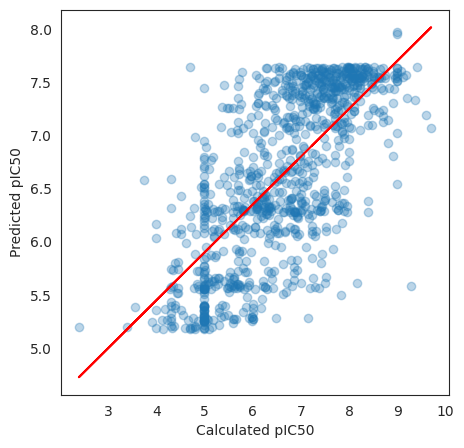

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train), 'red')
plt.ylabel('Predicted pIC50')
plt.xlabel('Calculated pIC50')

plt.savefig('/content/drive/MyDrive/ROCK1 files (R-CRAN)/stackmodel_train_scatter.png')

### **Test set**

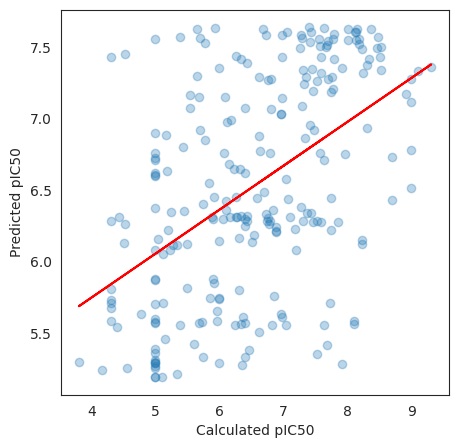

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_test_pred, alpha=0.3)

z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test), 'red')
plt.ylabel('Predicted pIC50')
plt.xlabel('Calculated pIC50')

plt.savefig('/content/drive/MyDrive/ROCK1 files (R-CRAN)/stackmodel_test_scatter.png')

# **2.5.4 Model evaluation**
Further evaluation of the stacked model, it is subjected to Y-scrambling/Y-shuffling

## **Y-scrambling**

**Y is subjected to scrambling and fitted into the stacked model in order to see if the model is robust**

In [ ]:
mse_train_list_scram = []

for i in range(100):
    # Y-Shuffling/Y-Scrambling
    y_train_shuffled = y_train.sample(frac=1, replace=False, random_state=i)


    # Model building
    with parallel_backend('multiprocessing', n_jobs=8):
      estimator_list_scram = [
        ('dtr', DecisionTreeRegressor(splitter='best', min_samples_split=18, min_samples_leaf=14, max_features='auto', max_depth=5, criterion='poisson')),
        ('svr', SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))
      ]

      stackmodel_scram = StackingRegressor(
          estimators=estimator_list_scram,
          final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

      stackmodel_scram.fit(x_train, y_train_shuffled)

    # Make prediction
    y_train_pred_scram = stackmodel_scram.predict(x_train)
    y_test_pred_scram = stackmodel_scram.predict(x_test)

    # Compute mse score
    mse_scram = mean_squared_error(y_train_shuffled, y_train_pred_scram)
    mse_train_list_scram.append(mse_scram)

# MSE score
print(mse_train_list_scram)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

[1.540469797839979, 1.5183108972700055, 1.4909343098694718, 1.5208383736418936, 1.5404650587924846, 1.5323357517218925, 1.6372815210477654, 1.4582520624140252, 1.5823234247054918, 1.4779859249512264, 1.5052276297882126, 1.4804939362909746, 1.5213603814599976, 1.5569961227737013, 1.5459755273520082, 1.5692764377105457, 1.6761325318702165, 1.6563221831316406, 1.4614148464660826, 1.583537980450249, 1.5273403039685414, 1.5368125545578466, 1.7827798931648686, 1.63547993234688, 1.4513647345016296, 1.4593539158215885, 1.5098619082163165, 1.5191315777550263, 1.6185632803781027, 1.3839793716550484, 1.6576618018597542, 1.63601281485253, 1.4513697470323377, 1.6780294643972176, 1.4579698118052324, 1.4766276554116209, 1.6006433892955352, 1.5246571359792447, 1.467224930894338, 1.567018560500083, 1.6293257562769983, 1.5833866644213614, 1.4653576143445368, 1.4869336473459407, 1.5818406608421245, 1.5411055462615135, 1.426831219508042, 1.5535316122447593, 1.6386225493131408, 1.493001113567507, 1.5594405

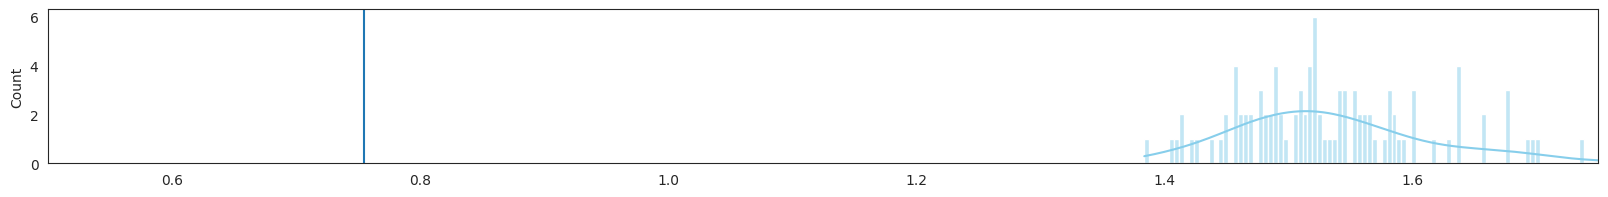

In [ ]:
# Training performance visualization for the MSE
# Stacked model vs Stacked Y-scrambled model
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 2))

ax = sns.histplot(data=mse_train_list_scram, color="skyblue", kde=True, bins = 100)
plt.axvline(stackmodel_train_mse)
ax.set(xlim=(0.5, 1.75))

plt.savefig('/content/drive/MyDrive/ROCK1 files (R-CRAN)/y_scrambling_hist.png')

# **2.5.5 Feature Importance**
**Features that played the greatest importance on the stacked model based on the test set**

## **Molecular descriptors**

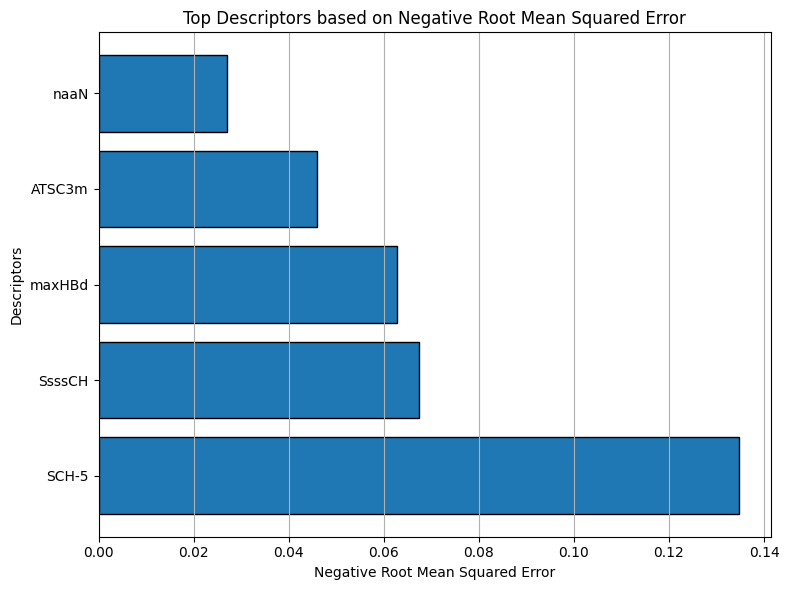

In [ ]:
# Extracting only neg_root_mean_squared_error
# Histogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

scoring = ['neg_root_mean_squared_error']
r_multi = permutation_importance(
     stackmodel, x_test, y_test, n_repeats=5, random_state=0, scoring=scoring) # change number of repeats to 30

rmse_importances = r_multi['neg_root_mean_squared_error'].importances_mean
rmse_indices_sorted = rmse_importances.argsort()[::-1]

top_descriptors = 5 # change to 25 as final

top_descriptors_names = [x.columns[i] for i in rmse_indices_sorted[:top_descriptors]]
top_descriptors_scores = [rmse_importances[i] for i in rmse_indices_sorted[:top_descriptors]]

plt.figure(figsize=(8, 6))
plt.barh(top_descriptors_names, top_descriptors_scores, edgecolor='black')
plt.xlabel('Negative Root Mean Squared Error')
plt.ylabel('Descriptors')
plt.title('Top Descriptors based on Negative Root Mean Squared Error')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

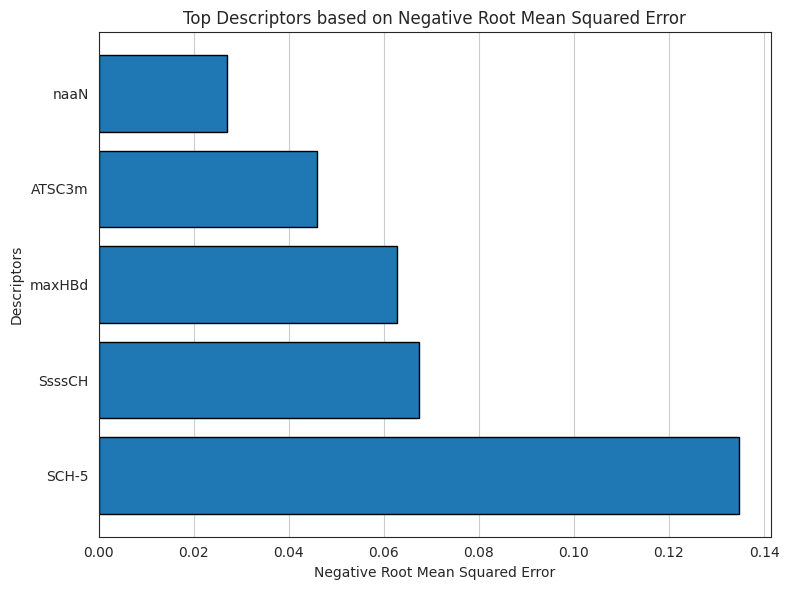

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.barh(top_descriptors_names, top_descriptors_scores, edgecolor='black')
plt.xlabel('Negative Root Mean Squared Error')
plt.ylabel('Descriptors')
plt.title('Top Descriptors based on Negative Root Mean Squared Error')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/ROCK1 files (R-CRAN)/descriptors_bar.png')

## **MACCS fingerprint keys**

In [ ]:
y_maccs = df['pIC50']
x_maccs = x_md_fp.drop(df.loc[:, 'nAcid':'Zagreb'].columns, axis=1)

In [ ]:
x_maccs

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1213,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1214,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1215,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
y_maccs

0       2.397940
1       3.397940
2       3.568636
3       3.741602
4       3.803824
          ...   
1212    9.309804
1213    9.366532
1214    9.408935
1215    9.585027
1216    9.698970
Name: pIC50, Length: 1217, dtype: float64

In [ ]:
# Data splitting (80:20)
from sklearn.model_selection import train_test_split

# Splitting MACCS keys to be fitted for feature importance
# in the stacked model
x_train_maccs, x_test_maccs, y_train_maccs, y_test_maccs = train_test_split(x_maccs, y_maccs, test_size=0.2, random_state=100)

In [ ]:
x_test_maccs

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
584,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
685,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
1207,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
500,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
139,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1065,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
164,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1036,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0


In [ ]:
y_test_maccs

584     6.616185
685     6.889410
1207    9.096910
500     6.301030
139     5.000000
          ...   
301     5.657577
1065    8.006123
164     5.000000
1036    7.920819
934     7.638272
Name: pIC50, Length: 244, dtype: float64

In [ ]:
# Stacking the tuning DTR and SVR
# models from rscv

from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


from joblib import parallel_backend

with parallel_backend('multiprocessing', n_jobs=8):
  estimator_list_maccs = [
      ('dtr', DecisionTreeRegressor(splitter='best', min_samples_split=18, min_samples_leaf=14, max_features='auto', max_depth=5, criterion='poisson')),
      ('svr', SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))
  ]

  stackmodel_maccs = StackingRegressor(
      estimators=estimator_list_maccs,
      final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

  stackmodel_maccs.fit(x_train_maccs, y_train_maccs)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

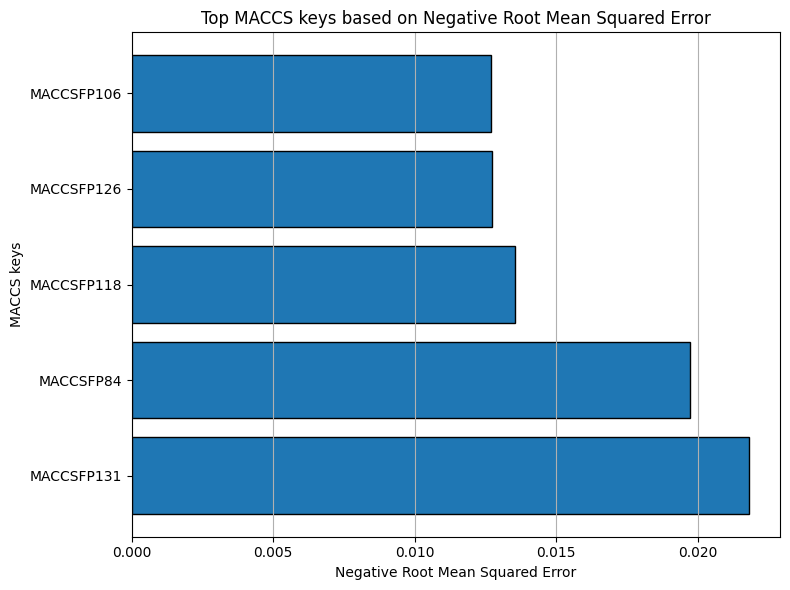

In [ ]:
# Extracting only neg_root_mean_squared_error
# Histogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


from joblib import parallel_backend

with parallel_backend('multiprocessing', n_jobs=8):
  scoring_maccs = ['neg_root_mean_squared_error']
  r_multi_maccs = permutation_importance(
      stackmodel_maccs, x_test_maccs, y_test_maccs, n_repeats=5, random_state=0, scoring=scoring_maccs) # change number of repeats to 30

  rmse_importances_maccs = r_multi_maccs['neg_root_mean_squared_error'].importances_mean
  rmse_indices_sorted_maccs = rmse_importances_maccs.argsort()[::-1]

  top_maccs = 5 # change to 25 as final

  top_maccs_names = [x_maccs.columns[i] for i in rmse_indices_sorted_maccs[:top_maccs]]
  top_maccs_scores = [rmse_importances_maccs[i] for i in rmse_indices_sorted_maccs[:top_maccs]]

plt.figure(figsize=(8, 6))
plt.barh(top_maccs_names, top_maccs_scores, edgecolor='black')
plt.xlabel('Negative Root Mean Squared Error')
plt.ylabel('MACCS keys')
plt.title('Top MACCS keys based on Negative Root Mean Squared Error')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

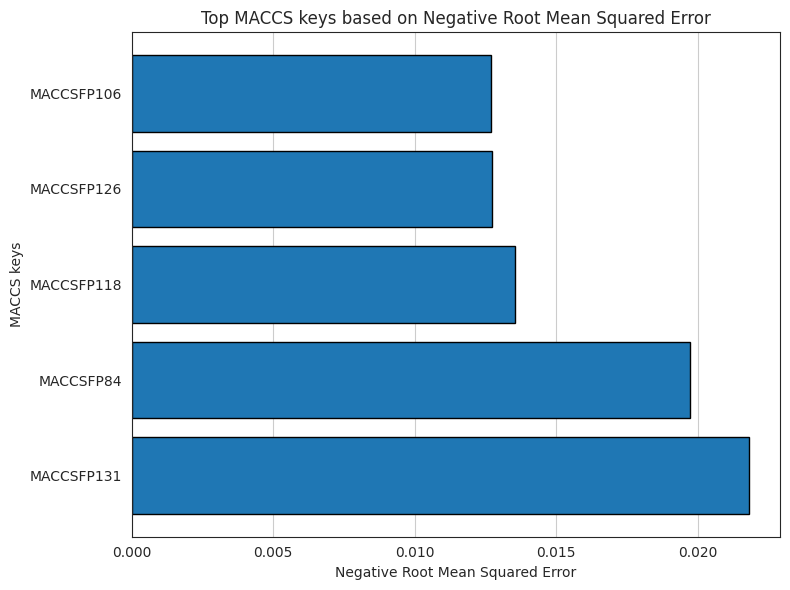

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(top_maccs_names, top_maccs_scores, edgecolor='black')
plt.xlabel('Negative Root Mean Squared Error')
plt.ylabel('MACCS keys')
plt.title('Top MACCS keys based on Negative Root Mean Squared Error')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/ROCK1 files (R-CRAN)/maccs_bar.png')

# **2.5.6 Molecule Extraction**
**Extracting the molecules that have non-zero values on the top descriptors and MACCS keys that played an importance on the stacked model**

## **Descriptors**

In [ ]:
selected_columns = ['naaN', 'ATSC3m', 'maxHBd', 'SsssCH', 'SCH-5']

# Filter rows where selected columns have non-zero values
non_zero_rows = x[(x['naaN'] != 0) & (x['ATSC3m'] != 0) & (x['maxHBd'] != 0) & (x['SsssCH'] != 0) & (x['SCH-5'] != 0)]

selected_columns_tail = non_zero_rows[selected_columns]
selected_columns_tail

,naaN,ATSC3m,maxHBd,SsssCH,SCH-5
15,2.0,-13.963262,0.449520,0.010543,0.117851
16,3.0,54.376537,0.500381,0.152882,0.096225
18,1.0,-168.140108,0.394139,0.301526,0.117851
19,2.0,-429.253977,0.464582,-0.100841,0.117851
22,3.0,-388.664404,0.444888,1.300618,0.096225
...,...,...,...,...,...
1205,1.0,-299.985106,0.574028,0.388946,0.126852
1207,1.0,-108.688696,0.552513,-0.114605,0.144338
1208,1.0,4.084423,0.579962,-0.242366,0.144338
1213,1.0,-414.071408,0.576402,0.205611,0.144338


## **MACCS keys**

In [ ]:
selected_columns = ['MACCSFP106', 'MACCSFP126', 'MACCSFP118', 'MACCSFP84', 'MACCSFP131']

# Filter rows where selected columns have non-zero values
non_zero_rows = x_maccs[(x_maccs['MACCSFP106'] != 0) & (x_maccs['MACCSFP126'] != 0) & (x_maccs['MACCSFP118'] != 0) & (x_maccs['MACCSFP84'] != 0) & (x_maccs['MACCSFP131'] != 0)]

selected_columns_tail = non_zero_rows[selected_columns]
selected_columns_tail

,MACCSFP106,MACCSFP126,MACCSFP118,MACCSFP84,MACCSFP131
97,1,1,1,1,1
98,1,1,1,1,1
110,1,1,1,1,1
126,1,1,1,1,1
129,1,1,1,1,1
302,1,1,1,1,1
374,1,1,1,1,1


## **Molecules of interest**
These are the molecules that satisfied the top 5 descriptors and MACCS keys that have the greatest effect on the stacked model regressor

In [ ]:
index_number = [97, 98, 110, 126, 129]
selected_row = df.iloc[index_number]

selected_row

,Unnamed: 0,Molecule.ChEMBL.ID,Bioactivity.Class,pIC50,Name,nAcid,ALogP,ALogp2,AMR,apol,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
97,98,CHEMBL1765748,intermediate,5.0,CHEMBL1765748,0,-1.5606,2.435472,61.5810,66.034204,...,1,1,1,1,1,1,1,1,1,0
98,99,CHEMBL1614776,intermediate,5.0,CHEMBL1614776,0,-1.5713,2.468984,66.1654,69.127790,...,1,1,1,1,1,1,1,1,1,0
110,111,CHEMBL1765749,intermediate,5.0,CHEMBL1765749,0,-1.5713,2.468984,66.1654,69.127790,...,1,1,1,1,1,1,1,1,1,0
126,127,CHEMBL1765746,intermediate,5.0,CHEMBL1765746,0,-1.5606,2.435472,61.5810,66.034204,...,1,1,1,1,1,1,1,1,1,0
129,130,CHEMBL1765747,intermediate,5.0,CHEMBL1765747,0,-1.5606,2.435472,61.5810,66.034204,...,1,1,1,1,1,1,1,1,1,0


# **Exporting to Google Drive**

**Exporting all of the necessary dataframes, results**

**Images are already exported in their respective cells**

In [ ]:
# Train and test sets
x_train.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/x_train.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/y_train.csv', index=False)

x_test.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/x_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/y_test.csv', index=False)

In [ ]:
# Lazy Predict performance
lazypredict_train_results = pd.DataFrame(models_train)
lazypredict_test_results = pd.DataFrame(models_test)

lazypredict_train_results.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/models_train.csv', index=False)
lazypredict_test_results.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/models_test.csv', index=False)

In [ ]:
# Stacked model performance
stacked_results.to_csv('/content/drive/MyDrive/ROCK1 files (R-CRAN)/stacked_results.csv', index=False)

# **---------------------------------------------------------------------------------------------------------**

# **Old codes**

In [ ]:
#parameters = {
    #
#}

# 5-fold cross-validation of the stacked model
#gscv = GridSearchCV(stackmodel, parameters, cv=5)
#gscv.fit(x_train, y_train)
#GridSearchCV(estimator=StackingRegressor(
     #estimators=estimator_list,
     #final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1)), param_grid=parameters)

In [ ]:
# Visualization

In [ ]:
# enter kevwhaledog

## **Cross-validated stacked model performance**

In [ ]:
# MSE score
sorted(gscv.cv_results_.keys())

In [ ]:
# Visualization

## **Feature Importance**

In [ ]:
# Extracting only neg_mean_squared_error
# Histogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

scoring = ['neg_mean_squared_error']
r_multi = permutation_importance(
     stackmodel, x_test, y_test, n_repeats=5, random_state=0, scoring=scoring) # change number of repeats to 30

mse_importances = r_multi['neg_mean_squared_error'].importances_mean
mse_indices_sorted = mse_importances.argsort()[::-1]

top_descriptors = 5 # change to 25 as final

top_descriptors_names = [x.columns[i] for i in mse_indices_sorted[:top_descriptors]]
top_descriptors_scores = [mse_importances[i] for i in mse_indices_sorted[:top_descriptors]]

plt.figure(figsize=(8, 6))
plt.barh(top_descriptors_names, top_descriptors_scores, edgecolor='black')
plt.xlabel('Negative Mean Squared Error')
plt.ylabel('Descriptors')
plt.title('Top Descriptors based on Negative Mean Squared Error')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### **Molecular descriptors**

In [ ]:
# Using permutation importance
from sklearn.inspection import permutation_importance

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
     stackmodel, x_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
     print(f"{metric}")
     r = r_multi[metric]
     for i in r.importances_mean.argsort()[::-1]:
         if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
             print(f"    {x.columns[i]:<8}"
                   f"{r.importances_mean[i]:.3f}"
                   f" +/- {r.importances_std[i]:.3f}")

r2
    maxHBd  0.192 +/- 0.063
    SaaN    0.125 +/- 0.037
    maxssO  0.096 +/- 0.026
    RotBtFrac0.088 +/- 0.029
    ZMIC1   0.087 +/- 0.024
    IC2     0.078 +/- 0.035
    topoDiameter0.046 +/- 0.018
    minsssCH0.046 +/- 0.014
    nHCsatu 0.041 +/- 0.015
    GATS2e  0.041 +/- 0.020
    ATSC1i  0.036 +/- 0.011
    nF10HeteroRing0.035 +/- 0.010
    ATSC4c  0.034 +/- 0.013
    VE1_Dzv 0.018 +/- 0.004
    AATSC2c 0.014 +/- 0.003
    ETA_dBeta0.010 +/- 0.005
    SpMax5_Bhv0.010 +/- 0.003
    JGT     0.006 +/- 0.001
    SM1_Dze 0.006 +/- 0.002
    VE2_D   0.003 +/- 0.001
    AATS0i  0.002 +/- 0.001
    VR1_Dzi 0.002 +/- 0.000
    ETA_Epsilon_30.001 +/- 0.000
    AATS6v  0.001 +/- 0.001
    SP-3    0.001 +/- 0.001
    VR2_Dzs 0.001 +/- 0.000
    maxHBint90.001 +/- 0.000
    TIC4    0.001 +/- 0.000
    GATS3i  0.000 +/- 0.000
    MWC9    0.000 +/- 0.000
    maxaasN 0.000 +/- 0.000
    VE3_Dzi 0.000 +/- 0.000
    ETA_Eta_R0.000 +/- 0.000
    ATSC3p  0.000 +/- 0.000
    MATS6m  0.000 +/- 0.

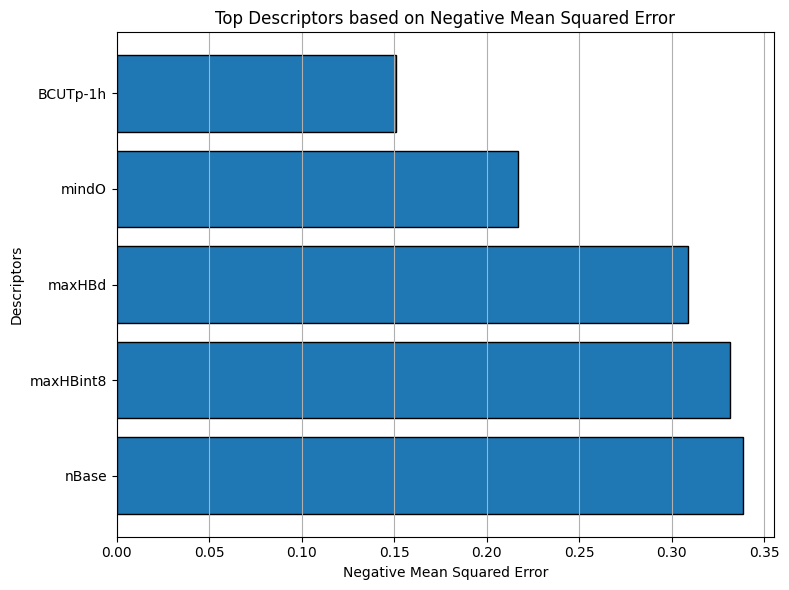

In [ ]:
# Extracting only neg_mean_squared_error
# Histogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

scoring = ['neg_mean_squared_error']
r_multi = permutation_importance(
     stackmodel, x_test, y_test, n_repeats=5, random_state=0, scoring=scoring) # change number of repeats to 30

mse_importances = r_multi['neg_mean_squared_error'].importances_mean
mse_indices_sorted = mse_importances.argsort()[::-1]

top_descriptors = 5 # change to 25 as final

top_descriptors_names = [x.columns[i] for i in mse_indices_sorted[:top_descriptors]]
top_descriptors_scores = [mse_importances[i] for i in mse_indices_sorted[:top_descriptors]]

plt.figure(figsize=(8, 6))
plt.barh(top_descriptors_names, top_descriptors_scores, edgecolor='black')
plt.xlabel('Negative Mean Squared Error')
plt.ylabel('Descriptors')
plt.title('Top Descriptors based on Negative Mean Squared Error')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## **Stacked model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model prediction
y_train_pred = stackmodel.predict(x_train)
y_test_pred = stackmodel.predict(x_test)

# Training set model performance
stackmodel_train_mse = mean_squared_error(y_train, y_train_pred)
stackmodel_train_rmse = np.sqrt(stackmodel_train_mse)
stackmodel_train_r2 = r2_score(y_train, y_train_pred)

# Test set model performance
stackmodel_test_mse = mean_squared_error(y_test, y_test_pred)
stackmodel_test_rmse = np.sqrt(stackmodel_test_mse)
stackmodel_test_r2 = r2_score(y_train, y_train_pred)

print('Model performance for Training set')
print('- MSE: %s' % stackmodel_train_mse)
print('- RMSE: %s' % stackmodel_train_rmse)
print('- R2: %s' % stackmodel_train_r2)
print('----------------------------------')
print('Model performance for Test set')
print('- MSE: %s' % stackmodel_test_mse)
print('- RMSE: %s' % stackmodel_test_rmse)
print('- R2: %s' % stackmodel_test_r2)

Model performance for Training set
- MSE: 0.23150330923020637
- RMSE: 0.4811479078518438
- R2: 0.8446403984222681
----------------------------------
Model performance for Test set
- MSE: 1.1406616625684007
- RMSE: 1.0680176321430281
- R2: 0.8446403984222681


In [ ]:
# Stacked model results
stacked_results = pd.DataFrame(['Stacked Model', stackmodel_train_mse, stackmodel_train_rmse, stackmodel_train_r2, stackmodel_test_mse, stackmodel_test_rmse, stackmodel_test_r2]).transpose()
stacked_results.columns = ['Model', 'Training MSE', 'Training RMSE', 'Training R2', 'Testing MSE', 'Testing RMSE', 'Testing R2']

stacked_results

,Model,Training MSE,Training RMSE,Training R2,Testing MSE,Testing RMSE,Testing R2
0,Stacked Model,0.23,0.48,0.84,1.14,1.07,0.84


# **Stacked model evaluation**

## **K-fold cross-validation**

In [ ]:
# Scoring metrics
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
from sklearn.model_selection import cross_val_score

stackreg_cv = StackingRegressor(
     estimators=estimator_list,
     final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

# RMSE as the scoring metric
scores_stackreg_cv = cross_val_score(stackreg_cv, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores_stackreg_cv

array([-1.21766853, -1.13753905, -1.25124708, -1.29458208, -0.89519246])

In [ ]:
print("%0.2f RMSE with a standard deviation of %0.2f" % (scores_stackreg_cv.mean(), scores_stackreg_cv.std()))

-1.16 RMSE with a standard deviation of 0.14


## **Y-scrambling**

In [ ]:
mse_train_list_scram = []

for i in range(10):
    # Y-Shuffling/Y-Scrambling
    y_train_shuffled = y_train.sample(frac=1, replace=False, random_state=i)

    # Model building
    estimator_list_scram = [
       ('etr', ExtraTreeRegressor()),
       ('svr', SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))
    ]

    stackmodel_scram = StackingRegressor(
        estimators=estimator_list_scram,
        final_estimator=SVR(kernel='rbf', C=2.4, gamma='scale', epsilon=0.34699, tol=0.002, max_iter=-1))

    stackmodel_scram.fit(x_train, y_train_shuffled)

    # Make prediction
    y_train_pred_scram = stackmodel_scram.predict(x_train)
    y_test_pred_scram = stackmodel_scram.predict(x_test)

    # Compute mse score
    mse_scram = mean_squared_error(y_train_shuffled, y_train_pred_scram)
    mse_train_list_scram.append(mse_scram)

# MSE score
print(mse_train_list_scram)

[1.4700345900561615, 1.7059213132041466, 1.38812938227201, 1.4823665293636064, 1.548810848580149, 1.5422299001481714, 1.6992751364738063, 1.4518709362469735, 1.5265647226716503, 1.5970356764493474]


[(0.0, 2.0)]

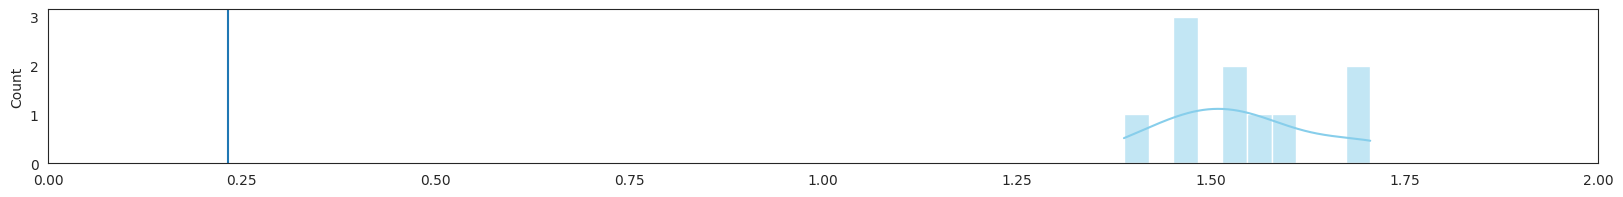

In [ ]:
# Training performance visualization for the MSE
# Stacked model vs Stacked Y-scrambled model
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 2))

ax = sns.histplot(data=mse_train_list_scram, color="skyblue", kde=True, bins = 10)
plt.axvline(stackmodel_train_mse)
ax.set(xlim=(0, 2))